## First-Order Gradient Descent

In mathematics, gradient descent (also often called steepest descent) is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent.

Gradient Descent requirements for a function:
- Differentiable
- Convex


### Differentiable
A function is differentiable when its derivative exists at each point in its domain. In other words, the graph of a differentiable function has a non-vertical tangent line at each interior point in its domain.
<center><img src="../images/Polynomialdeg3.svg.png"/></center>

Examples of non-differentiable graphs:
<center><img src="../images/nondifferential.webp"/></center>

### Convex
For a univariate function, this means that the line segment connecting two function’s points lays on or above its curve (it does not cross it). If it does it means that it has a local minimum which is not a global one.

<center><img src="../images/convex.webp"/></center>


Gradient descent is based on the observation that if the multi-variable function **F(x)** is defined and differentiable in a neighborhood of a point **a**, then **F(x)** decreases *fastest* if one goes from a in the direction of the negative gradiant of **F** at **a**,  **-∇F(a)**.


For a small enough step size or learning rate $\gamma \in \mathbb {R}_+$, then $F(\mathbf {a_{n}} )\geq F(\mathbf {a_{n+1}})$. In other words, the term $\gamma \nabla F(\mathbf {a})$ is subtracted from $\mathbf {a}$ because we want to move against the gradient, toward the local minimum. With this observation in mind, one starts with a guess $\mathbf {x}_0$ for a local minimum of $F$, and considers the sequence $\mathbf {x}_0, \mathbf {x}_1, \mathbf {x}_2, \ldots$ such that

$$
\mathbf {x}_{n+1} = \mathbf {x}_n - \gamma _n \nabla F(\mathbf {x}_n),\ n\geq 0.
$$

We have a monotonic sequence

$$
F(\mathbf {x}_0) \geq F(\mathbf {x}_1) \geq F(\mathbf {x}_2) \geq \cdots,
$$

so, hopefully, the sequence $(\mathbf {x}_n)$ converges to the desired local minimum. Note that the value of the step size $\gamma$ is allowed to change at every iteration.

It is possible to guarantee the convergence to a local minimum under certain assumptions on the function $F$ (for example, $F$ convex and $\nabla F$ Lipschitz) and particular choices of $\gamma$.
$$
\gamma_n = \frac{\left|\left(\mathbf {x}_n - \mathbf {x}_{n-1}\right)^T \left[\nabla F(\mathbf {x}_n) - \nabla F(\mathbf {x}_{n-1})\right]\right|}{\left\|\nabla F(\mathbf {x}_n) - \nabla F(\mathbf {x}_{n-1})\right\|^2}
$$



srcs: 
- https://en.wikipedia.org/wiki/Gradient_descent
- https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

(-1.0658141036401503e-14, -3.0, -3.0)


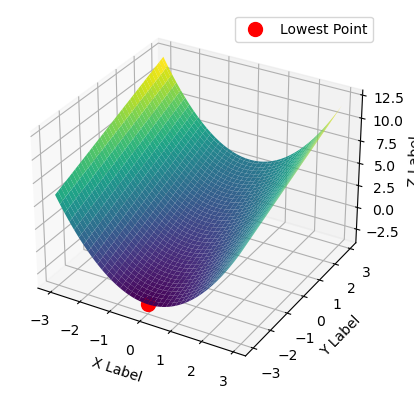

In [11]:
def func(x, y):
    return x**2 + y

def plot_function(func, x, y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(x, y)
    zs = np.array([func(x, y) for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)

    lowest_point_idx = np.unravel_index(np.argmin(Z), Z.shape)
    lowest_x = X[lowest_point_idx]
    lowest_y = Y[lowest_point_idx]
    lowest_z = Z[lowest_point_idx]

    print((lowest_x, lowest_y, lowest_z))

    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.scatter(lowest_x, lowest_y, lowest_z, color='red', s=100, label='Lowest Point')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.legend()
    plt.show()

x = y = np.arange(-3.0, 3.0, 0.05)
plot_function(func, x, y)
